<a href="https://colab.research.google.com/github/manvendra7/datascience/blob/master/SVM_Face_Recognization(project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_lfw_people  #importing the lfw people dataset from sklearn package
faces = fetch_lfw_people(min_faces_per_person=60)  #selecting datasets with minimum 60 faces per person
print(faces.target_names)                           #checking for the target name
print(faces.images.shape)                           #checking the shpae of the the images 

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [2]:
faces.keys()        #checking for the keys in dataset

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [3]:
faces.data.shape     #checking the shape of the data

(1348, 2914)

In [4]:
faces.data        #checking the values in datasets

array([[138.        , 135.66667   , 127.666664  , ...,   1.6666666 ,
          1.6666666 ,   0.33333334],
       [ 71.333336  ,  56.        ,  67.666664  , ..., 247.66667   ,
        243.        , 238.33333   ],
       [ 84.333336  ,  97.333336  ,  72.333336  , ..., 114.        ,
        194.33333   , 241.        ],
       ...,
       [ 29.333334  ,  29.        ,  29.333334  , ..., 145.        ,
        147.        , 141.66667   ],
       [ 49.333332  ,  55.666668  ,  76.666664  , ..., 186.33333   ,
        176.33333   , 161.        ],
       [ 31.        ,  26.333334  ,  28.        , ...,  34.        ,
         42.        ,  69.666664  ]], dtype=float32)

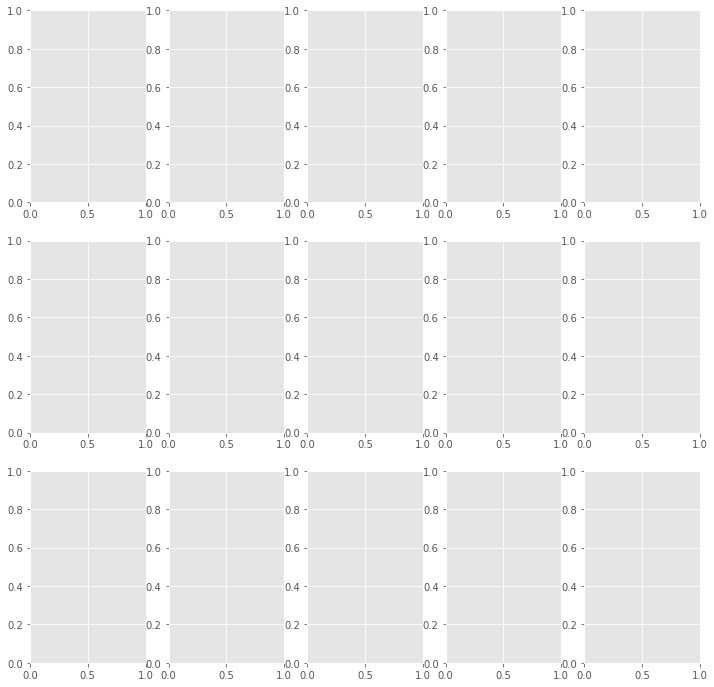

In [5]:
import matplotlib.pyplot as plt                      #importing matplotlib for visualization
from matplotlib import style                         #importing style from matplotlib package
style.use('ggplot')                                  #using ggplot style for plotiing
fig, ax = plt.subplots(3, 5, figsize = (12, 12))     #making subplots with 3 rows and 5 columnns with fig size 12 * 12

In [15]:
print(ax.flat)

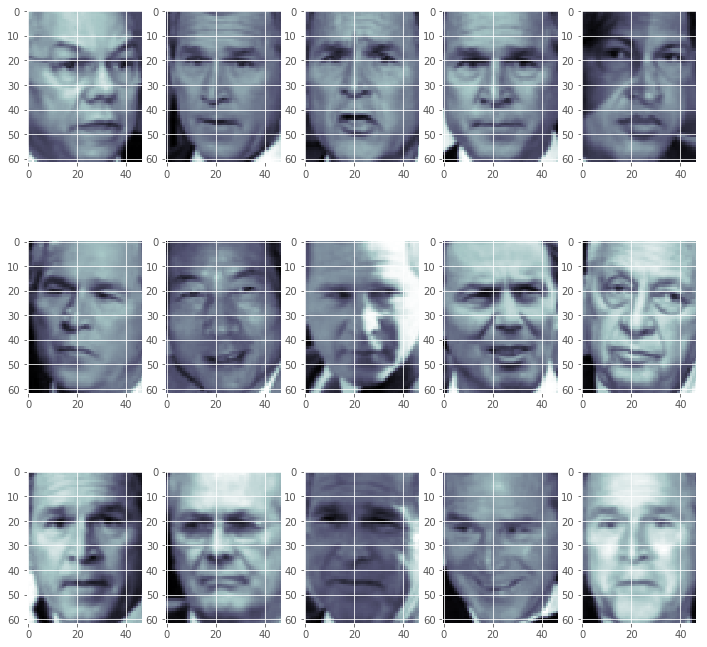

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
fig, ax = plt.subplots(3, 5, figsize = (12, 12))
for i, axi in enumerate(ax.flat):                    #plotting the faces on our graph 
    axi.imshow(faces.images[i],cmap='bone')
    

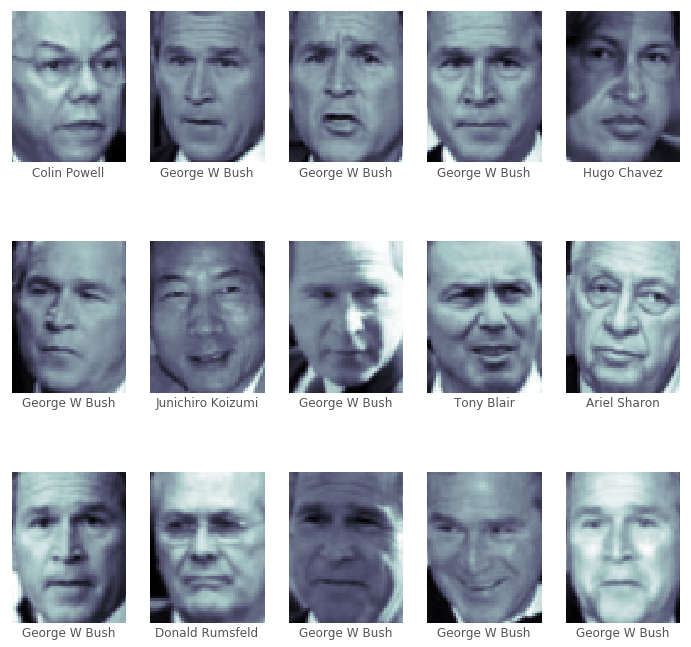

In [7]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

fig, ax = plt.subplots(3, 5, figsize = (12, 12))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],                            #removing the x and y ticks from the graph and setting the labels as target names
            xlabel=faces.target_names[faces.target[i]])
    

In [25]:
from sklearn.svm import SVC                                   #importing svm
from sklearn.decomposition import PCA as RandomizedPCA        #importing PCA for dimensonality reduction
from sklearn.pipeline import make_pipeline                     #importing pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)   #slecting only 150 important dimensions for our model
svc = SVC(kernel='rbf', class_weight='balanced')                      #selecting the rbf kernel and keeping the class weight balanced
model = make_pipeline(pca, svc)                                       #making a pipeline for our model using pca and svc
model

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [0]:
from sklearn.model_selection import train_test_split                      #importing train_test_split from sklearn for training and testing our model
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)          #splitting our dataset in train and test with random state=42

In [27]:
from sklearn.model_selection import GridSearchCV               #importing GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],                       
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}   #specifying the c and gamma value
grid = GridSearchCV(model, param_grid)                         #making grid with model and param_grid

%time grid.fit(Xtrain, ytrain)                #checking for the time taken by grid
print(grid.best_params_)                      #checking for the best parameters from grid

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 36.1 s, sys: 10.8 s, total: 46.8 s
Wall time: 26.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [0]:
model = grid.best_estimator_               #making the model with best estimators from our grid
yfit = model.predict(Xtest)                #predicting the target names based on our model 

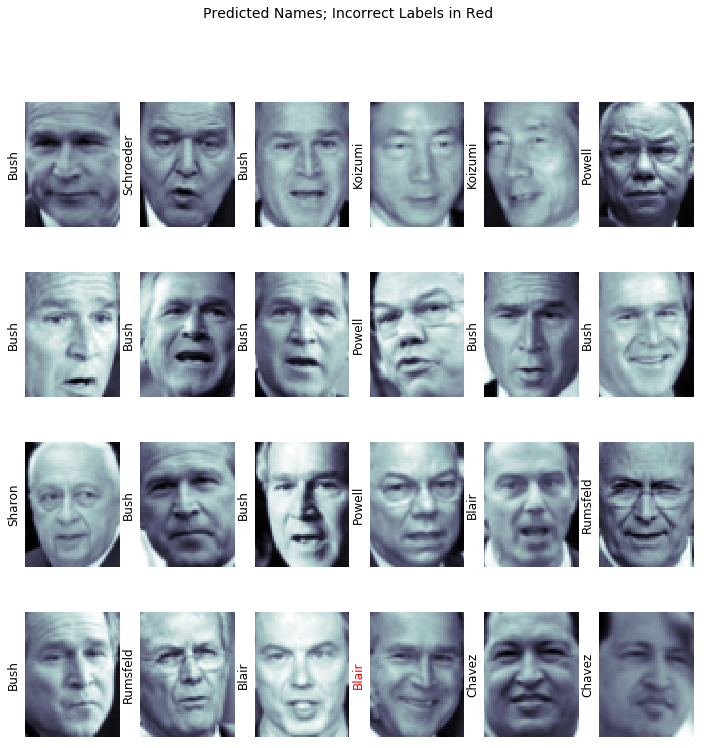

In [29]:
fig, ax = plt.subplots(4, 6, figsize = (12, 12))            #making subplot with 4 rows and 6 cols with fig size of 12*12
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')        #reshaping image in 62*47 dimensions
    axi.set(xticks=[], yticks=[])                             #removing xticks and yticks
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')    #plotting the names and images if the image is not being able to predict the actual name it is marked in red
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)      #giving subtitiles to our graph

plt.show()

In [30]:
from sklearn.metrics import classification_report     #importing the classification report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))   #checking for the classification report

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



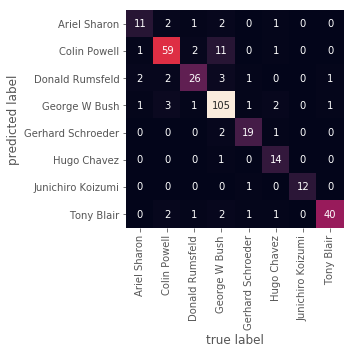

In [31]:
import seaborn as sns                             #importing seaborn
from sklearn.metrics import confusion_matrix      #importing confusion matrix

mat = confusion_matrix(ytest, yfit)              #creating confusion matrix for ytest and ytest
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)      #creating a heatmap to print our confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()